In [3]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import matplotlib.pyplot as pp
import numpy.random as npr
from datetime import datetime
from datetime import timedelta

# %matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

''' Create Helper Functions '''
''' Define cor and cov functions'''

def cov(set1,set2):
    return np.mean( (set1-np.mean(set1))*(set2-np.mean(set2)))

def cor(set1,set2):
    cov=np.mean( (set1-np.mean(set1))*(set2-np.mean(set2)))
    std1=np.std(set1)
    std2=np.std(set2)
    return cov/(std1*std2)


'''find nearest index to a value '''
def nearest_index(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def closest_indexes(array,values):
    indxs=np.zeros(len(values))
    for i in range(len(values)):
        indxs[i]=nearest_index(array, np.array(values)[i])
    return indxs.astype(np.int)


def closest(lst, K): 
      
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]



# Task 1

## Numerical And Analytical Solutions for Variance Minimisation

### 1) Analytical Solution

Define:

$X=N(e1,V_x^2) , Y=N(e2,V_y^2)$

$S = aX+bY$  :  $( a+b = 1 , 0<=a<=1, 0<=b<=1 )$

$P=$  $corr(X,Y)$; 
$C=Cov(X,Y)$



Since $b= 1-a $ ;
$S = aX+(1-a)Y$


Variance of the sum of two rundom variables i.e $ Var(S) = Var(X)+Var(Y)+2Cov(X,Y)
$

$V_x= Var(X);V_y=Var(Y)$

Thus

$S(a) = a^2*V_x+(1-a)^2*V_y+2*a*(1-a)*C
$

To find optimal $a$ and $b$ which minimise variance we need to find the firt derivative of the above function and set it to 0 to find the solution for $a$

$S(a)'= 2aV_x + 2(a-1)V_y+(2-4a)C == aV_x+V_ya-V_y+C-2aC
$

sett to 0

$aV_x+V_ya-V_y+C-2aC = 0
$
$
aV_x+V_ya-2aC = V_y-C
$
$a(V_x+V_y-2C )=V_y-C
$

$
a=\frac{(V_y-C)}{V_x+V_y-2C }
$

$
 b = 1-a
 $


### 2) Numerical Solution

Text(0, 0.5, 'Y')

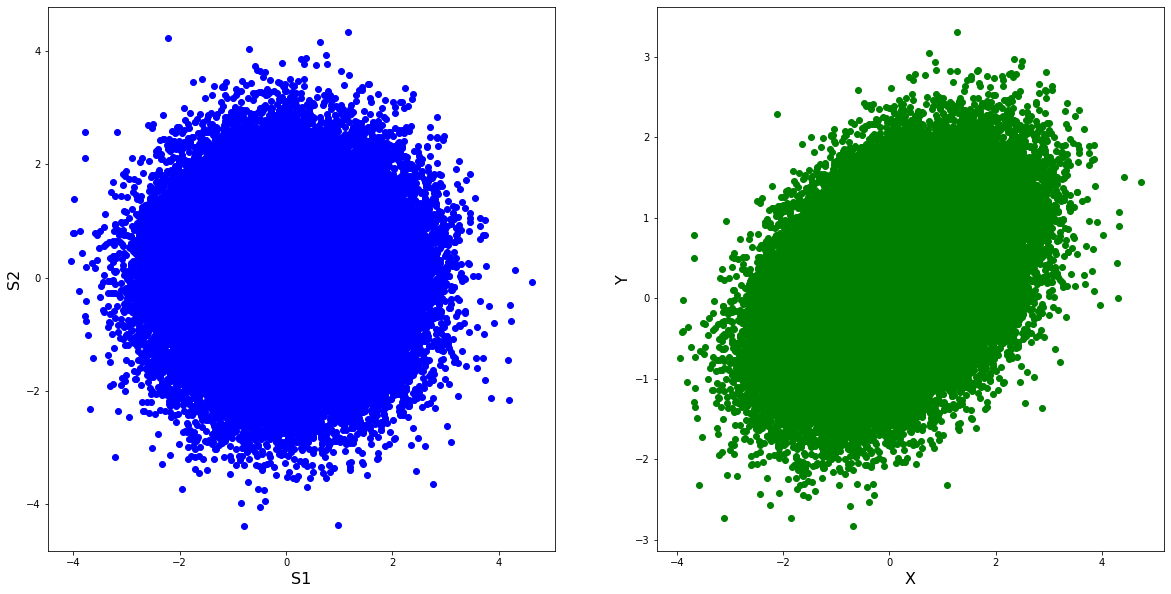

In [16]:

''' Define paramentres of 2 Normal Distribution and generate random variables'''

mu1=0.1 
mu2=0.2
std1=1
std2=0.7
var1=std1**2
var2=std2**2



dist1=np.random.normal(0,1,size=100000)
dist2=np.random.normal(0,1,size=100000)

'''Create Correlated Random Variable'''

rho=0.4 ### Correlation Coefficient
X=mu1+dist1*std1
Y=mu2+std2*(dist1*rho+np.sqrt(1-rho**2)*dist2)  ### Correcting the distribution to account for correlation

''' Display scatter plot of independent and correlated random variables'''
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(dist1,dist2,linestyle="",marker="o",color="blue")
plt.xlabel('S1', fontsize=16)
plt.ylabel('S2', fontsize=16)
plt.subplot(1,2,2)
plt.plot(X,Y,linestyle="",marker="o",color="green")
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
# print(cor(dist1,dist2))

Result of Analytical Solution = 0.22446222762818677 
Result of Numerical Solution = 0.2272272272272272


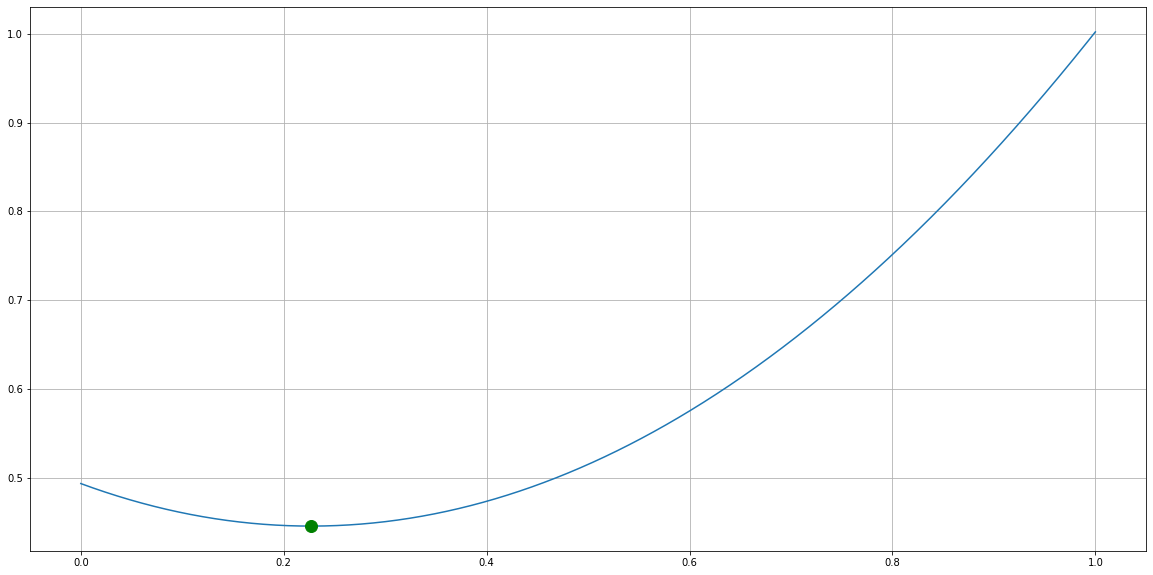

In [71]:
''' Design Iterative process of substituding the weights - 'a' and 'b' to calculate their cumulative variance'''

weights=np.linspace(0,1,1000)
vars=np.zeros(len(weights))
anal_var=np.zeros(len(weights))
minim=np.zeros(len(weights))

for i in range(len(weights)):
    a=weights[i]
    b=1-a
    S=a*X+b*Y
    vars[i]=np.var(S)

'''Finding the minimum point of the function'''
numer_solution=weights[nearest_index(vars,min(vars))]

''' Double Check Using Analytical Solution'''
C=cov(X,Y)
analytical_solution=(var2-C)/(-2*C + var1 + var2)

'''Plot Variance as afunction of Weights '''
plt.figure(figsize=(20,10))
plt.plot(weights,vars)
plt.plot(numer_solution, min(vars), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.grid(True)
# plt.plot(weights,anal_var,color='black')



print('Result of Analytical Solution =', analytical_solution,
'\nResult of Numerical Solution =',numer_solution)

# Task 2


## Download Data

In [18]:
path1 = r'D:\Programming\dnd_finance\dr_Yabich\Job_tasks\Orion_test\exec_logs.log'
exec_data=pd.read_csv(path1, header=None, sep=',')
path2 = r'D:\Programming\dnd_finance\dr_Yabich\Job_tasks\Orion_test\market_logs.log'
market_data=pd.read_csv(path2, header=None, sep=',')


## Prepare Data and Calculate Value


In [22]:
'''1) Prepare 'exec_logs' file and df
        Pull neccesary values from 'exec_logs' file strings '''
exec_time=[]
id=[]
exec_side=[]
exec_price=[]
exec_volume=[]
volume_left=[]
delta_execsend=[]
for i in range(len(exec_data)):
    exec_time.append(exec_data[0][i].split()[4])
    id.append(exec_data[0][i].split()[-1])
    exec_side.append(exec_data[1][i].split()[-1])
    exec_price.append(exec_data[2][i].split()[-1])
    exec_volume.append(exec_data[3][i].split()[-1])
    volume_left.append(exec_data[4][i].split()[-1])
    delta_execsend.append(exec_data[5][i].split()[-1])


'''Create 'Exec' Data Frames'''
exec_cols=['exec_time','id','exec_side','exec_price','exec_volume', 'volume_left','delta_execsend']
exec_df=pd.DataFrame(np.array([exec_time,id,exec_side, exec_price,exec_volume, volume_left,delta_execsend]).T,columns=exec_cols).astype(float)

''' Convert data into timestamp and calculate delta time from the moment of execution'''
exec_df['send_order_time']=exec_df['exec_time']-exec_df['delta_execsend']                       #time of sending order
exec_df['exec_time']=pd.to_datetime(exec_df['exec_time'] / 1000,unit = 'us')                    #Converting data into time of execution
exec_df['timestamp']=exec_df['exec_time'].copy()                                                #creating timestamp column to merge with market_logs data
exec_df['send_order_time']=pd.to_datetime(exec_df['send_order_time'] / 1000, unit = 'us')       #converting data into daytime
exec_df['delta_execsend']=(exec_df['exec_time']-exec_df['send_order_time']).dt.total_seconds()  #calculate time difference between sending order and order excecution


'''2) Prepare 'market_logs' file and df 
        Pull neccesary values from 'market_logs' file strings '''
timestamp=[]
side=[]
price=[]
volume=[]
bid_volume=[]
bid=[]
ask=[]
ask_volume=[]
for i in range(len(market_data)):
    timestamp.append(market_data[0][i].split()[4])
    side.append(market_data[0][i].split()[-1])
    price.append(market_data[1][i].split()[-1])
    volume.append(market_data[2][i].split()[2])
    bid_volume.append(market_data[2][i].split()[-1].split( '@' )[0])
    ask_volume.append(market_data[2][i].split()[-1].split( '@' )[-1])
    bid.append(market_data[2][i].split()[-1].split( '@' )[1].split('x')[0])
    ask.append(market_data[2][i].split()[-1].split( '@' )[1].split('x')[1])

'''Create 'Market' Data_Frame'''
markert_cols=['timestamp','side','price','volume','bid_volume','bid','ask','ask_volume']
market_df=pd.DataFrame(np.array([timestamp,side, price,volume, bid_volume,bid,ask,ask_volume]).T,columns=markert_cols).astype(float)

''' Converting timestamp to merge with 'exec_df' and  '''
market_df['timestamp']=pd.to_datetime(market_df['timestamp']/1000,unit = 'us')


''' 3) Merging exec_df and market_df'''
merged_df=pd.merge(market_df,exec_df,how='outer').sort_values(by='timestamp')

merged_df=merged_df.ffill()                                                                      # Filling empty slots to linearly calculate price difference between execution and market price  
merged_df['exec_time_passed']=(merged_df['timestamp']-merged_df['exec_time']).dt.total_seconds() # Time difference from execution in seconds
merged_df['mid_price']=(merged_df['bid']+merged_df['ask'])/2



''' pulling data that is as close as possible to 5 seconds past execution'''

df_greater_than_5_seconds=merged_df[merged_df['exec_time_passed']>5]                                                            # Select only values after 5 second of execution
minimal_time_diff_for_single_id=df_greater_than_5_seconds.groupby('id')['exec_time_passed'].min()                               # finding minimal 5 seconds value for uniqe trades by id
five_sec_past_df=df_greater_than_5_seconds[df_greater_than_5_seconds['exec_time_passed'].isin(minimal_time_diff_for_single_id)] # selecting values only for 5 seconds delay after trade execution


five_sec_past_df['dmid5']=(five_sec_past_df['mid_price']-five_sec_past_df['exec_price'])*five_sec_past_df['exec_side']


''' Calculate Final Correlation value between 'dmid5' & 'delta_execsend' '''

correlation=five_sec_past_df[['dmid5','delta_execsend']].corr()['delta_execsend'].iloc[0]

print( " Correlation value between 'dmid5' & 'delta_execsend' =",correlation)

 Correlation value between 'dmid5' & 'delta_execsend' = 0.03389192082793455
